In [1]:
%matplotlib notebook
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import h5py
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 12.0})

In [2]:
dem = np.loadtxt('simulations/lotka_dem.txt')

In [3]:
euler = np.loadtxt('simulations/lotka_euler_0.1.txt')

In [4]:
def lotka( t, x):
    y = np.empty(x.shape)
    y[0] =  x[0] - x[0]*x[1]
    y[1] = -x[1] + x[0]*x[1]
    return y

sol = scipy.integrate.solve_ivp(lotka, [0, 50], [ 2.0, 1.0], rtol=1e-6, atol=1e-6)

<IPython.core.display.Javascript object>


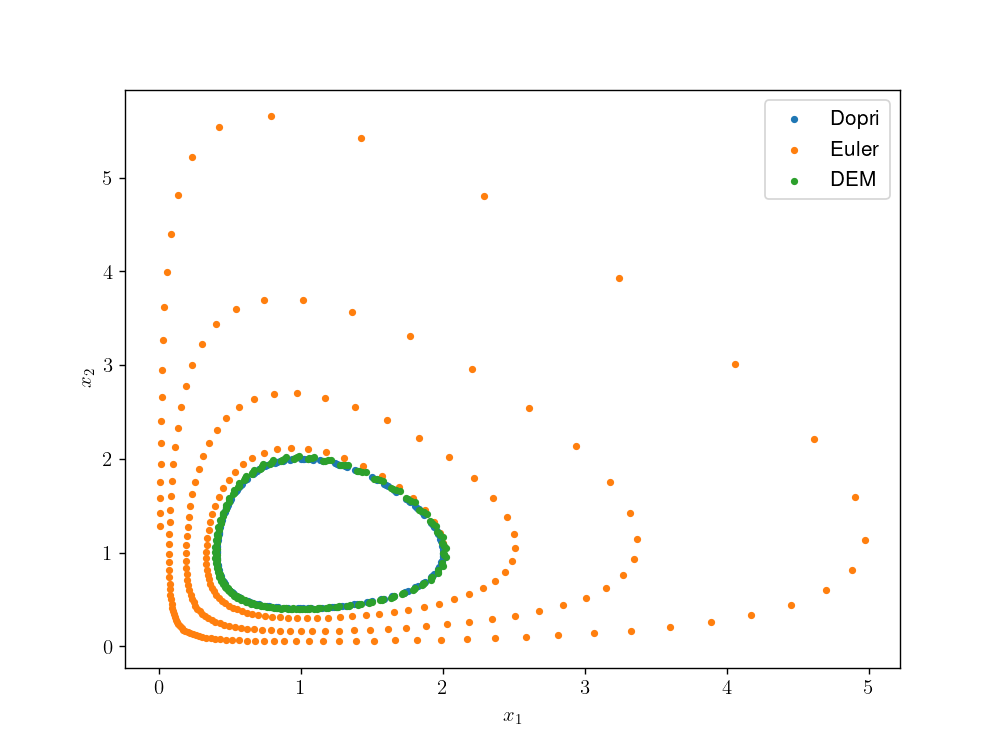

In [5]:
plt.figure(num="pic",figsize=(8,6))
plt.scatter(sol.y[0,:],sol.y[1,:], s=10, label="Dopri")
plt.scatter(euler[:2000,1],euler[:2000,2],s=10, label="Euler")
plt.scatter(dem[:,1],dem[:,2],s=10, label="DEM")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


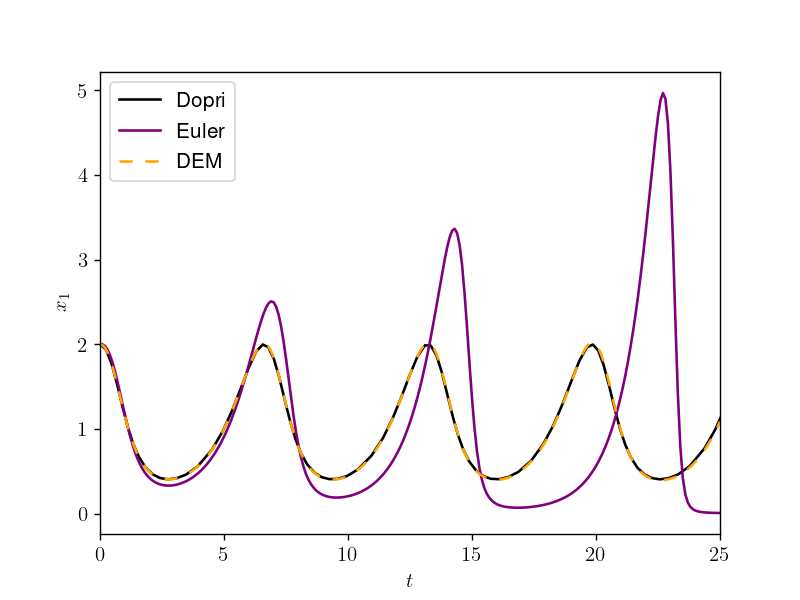

In [10]:
plt.figure(num="Comparison")
plt.plot(sol.t,sol.y[0,:], color="black", label="Dopri")
plt.plot(euler[:,0],euler[:,1], color="purple", label="Euler")
plt.plot(dem[:,0],dem[:,1], linestyle="--", dashes=(5,5), color="orange", label="DEM")
plt.xlabel("$t$")
plt.ylabel("$x_1$")
plt.xlim([0, 25])
plt.legend()
plt.show()